LSTM RNN

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # Tensorflow verision; only in colab
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np

TensorFlow 2.x selected.


In [0]:
import matplotlib.pyplot as plt

def plot_graph(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

Setup input Pipeline

In [3]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


Tokenizer

In [0]:
tokenizer = info.features['text'].encoder

In [5]:
print('Vocabulary size: {}'.format(tokenizer.vocab_size))

Vocabulary size: 8185


In [6]:
sample_string = 'TensorFlow is cool.'

tokenized_string = tokenizer.encode(sample_string)
print('Tokenized String is: {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print('Tokenized String is: {}'.format(original_string))

assert original_string == sample_string

Tokenized String is: [6307, 2327, 4043, 4265, 9, 2724, 7975]
Tokenized String is: TensorFlow is cool.


The tokenizer encodes the string by breaking it into subwords if the word is not in the dictionary

In [7]:
for ts in tokenized_string:
  print('{}----> {}'.format(ts, tokenizer.decode([ts])))

6307----> Ten
2327----> sor
4043----> Fl
4265----> ow 
9----> is 
2724----> cool
7975----> .


In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [0]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)

test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

Create the model

In [0]:
model = tf.keras.Sequential([
                              tf.keras.layers.Embedding(tokenizer.vocab_size,64),
                              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                              tf.keras.layers.Dense(64, activation='relu'),
                              tf.keras.layers.Dense(1, activation='sigmoid')
])

Compile the Keras model to configure the training process

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


Train the model

In [13]:
history = model.fit(train_dataset, epochs=2,validation_data=test_dataset)

Epoch 1/2
391/391 [==============================] - 76s 194ms/step - loss: 0.5497 - accuracy: 0.7147 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/2
391/391 [==============================] - 70s 178ms/step - loss: 0.3801 - accuracy: 0.8413 - val_loss: 0.4024 - val_accuracy: 0.8320


In [14]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 21s 54ms/step - loss: 0.4024 - accuracy: 0.8320
Test Loss: 0.40240489125556655
Test Accuracy: 0.8319600224494934


Review is positive if prediction>=0.5 else negative

In [0]:
def pad_to_size(vec, size):
  zeros = [0] * (size-len(vec))
  vec.extend(zeros)
  return vec

In [0]:
def sample_predict(sentence, pad):
  encoded_sample_pred_text = tokenizer.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))

  return (predictions)


In [17]:
# predict on a sample text without padding.

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print (predictions)

[[0.6240271]]


In [18]:
# predict on a sample text with padding

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print (predictions)

[[0.6583806]]


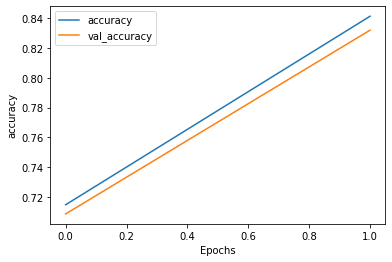

In [19]:
plot_graph(history, 'accuracy')

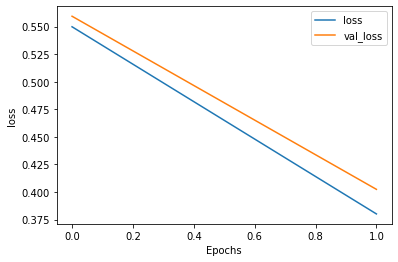

In [20]:
plot_graph(history, 'loss')

Stack two or more LSTM layers

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
history = model.fit(train_dataset, epochs=2,
                    validation_data=test_dataset)

Epoch 1/2
391/391 [==============================] - 125s 320ms/step - loss: 0.6280 - accuracy: 0.6509 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/2
391/391 [==============================] - 120s 306ms/step - loss: 0.5355 - accuracy: 0.7515 - val_loss: 0.5576 - val_accuracy: 0.7271


In [29]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 36s 93ms/step - loss: 0.5576 - accuracy: 0.7271
Test Loss: 0.5575634916420178
Test Accuracy: 0.7270799875259399


In [30]:
# predict on a sample text without padding.

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print (predictions)

[[0.53095347]]


In [31]:
# predict on a sample text with padding

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print (predictions)

[[0.19400027]]


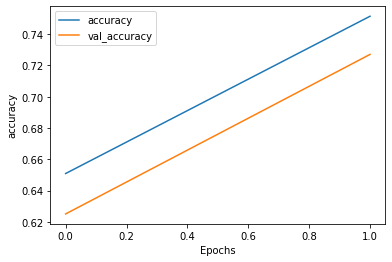

In [32]:
plot_graph(history, 'accuracy')

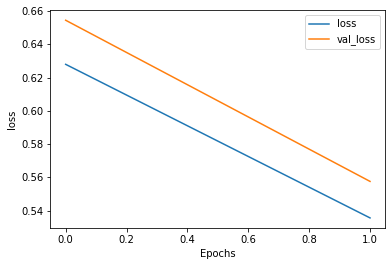

In [33]:
plot_graph(history, 'loss')

Conclusion